# Declaration of Originality

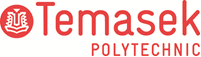

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Dylan Yeo Wen Feng
* Tutorial Group                : TC02
* Tutor						    : Ms Ester Goh
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [59]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Business Understanding

The Credit Card Default Dataset contains information on 30,000 credit card clients, including their demographic profiles, credit limits, billing statements, repayment history, and previous payment behaviour. Each record represents a snapshot of a customer’s financial status and repayment behaviour over recent billing cycles.

The goal of this project is to develop a machine learning model that predicts the likelihood of a credit card customer defaulting on their next payment.

By accurately identifying high-risk customers in advance, the model can support financial institutions in:
- Reducing potential financial losses
- Improving credit risk management
- Making data-driven decisions on credit limits and intervention strategies

# 2. Data Understanding

## 2.1 Load dataset

In [60]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "default-of-credit-card-clients.xlsx"
df = pd.read_excel(FILE_PATH, header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## 2.2 Summary Statistics

In [61]:
## Understand the type of variable for each column
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [62]:
## Check for missing data
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [63]:
df.shape

(30000, 25)

In [64]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [85]:
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


LIMIT_BAL:
LIMIT_BAL
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64

SEX:
SEX
2    18112
1    11888
Name: count, dtype: int64

EDUCATION:
EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

MARRIAGE:
MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

AGE:
AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
57     122
58     122
59      83
21      67
60      67
61      56
62      44
64      31
63      31
66      25
65      24
67      16
69      

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

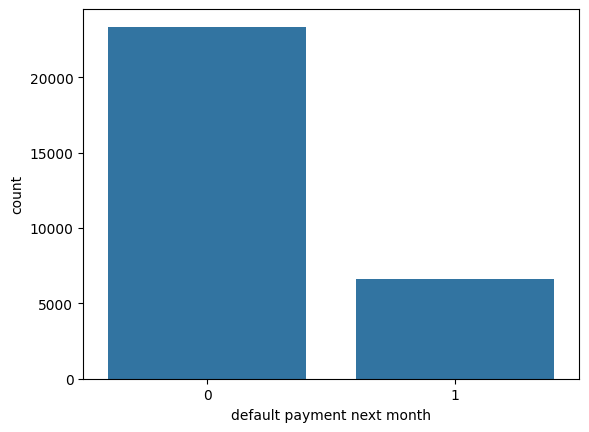

In [66]:
## Understanding distribution of target
sns.countplot(x="default payment next month", data=df)
plt.show()

In [67]:
df["default payment next month"].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

The target variable (default) is imbalanced, with a significantly larger proportion of non-default cases compared to default cases. This indicates that most credit card clients do not default on their payments. The presence of class imbalance suggests that accuracy alone may not be a sufficient evaluation metric for predictive modelling, and alternative metrics such as recall, precision, or AUC should be considered.

### 2.3.1.2 Understanding distribution of features

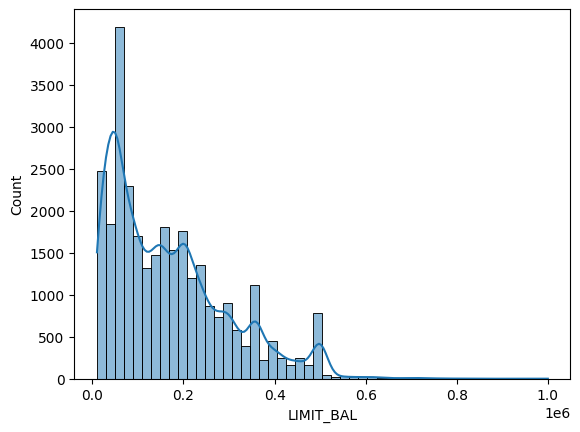

In [68]:
## Understanding distribution of features
sns.histplot(df["LIMIT_BAL"], bins=50, kde=True)
plt.show()


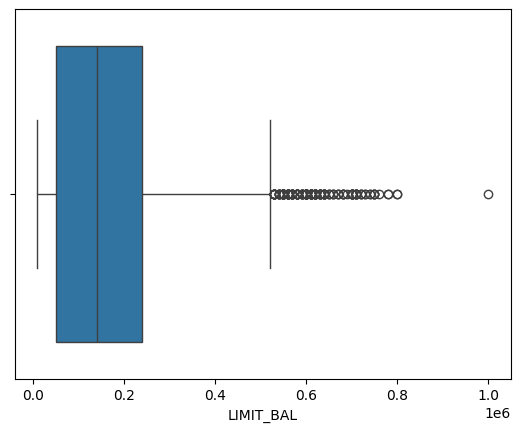

In [69]:
sns.boxplot(x=df["LIMIT_BAL"])
plt.show()

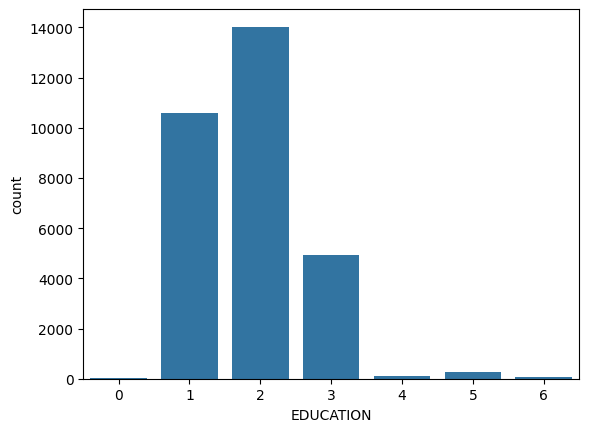

In [70]:
sns.countplot(x="EDUCATION", data=df)
plt.show()

The numerical features, including credit limit (LIMIT_BAL), billing amounts (BILL_AMT*), and payment amounts (PAY_AMT*), exhibit right-skewed distributions with the presence of extreme outliers. This suggests that a small number of clients hold very high credit limits or make unusually large payments. The age distribution is more concentrated but still shows mild skewness. Categorical features such as education level, marital status, and gender display uneven category frequencies, indicating that some demographic groups are more prevalent in the dataset than others.

### 2.3.2 Understanding relationship between variables

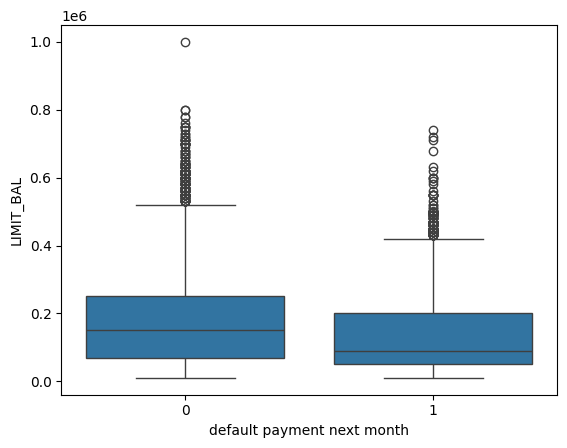

In [71]:
## Understanding relationship between variables
sns.boxplot(x="default payment next month", y="LIMIT_BAL", data=df)
plt.show()

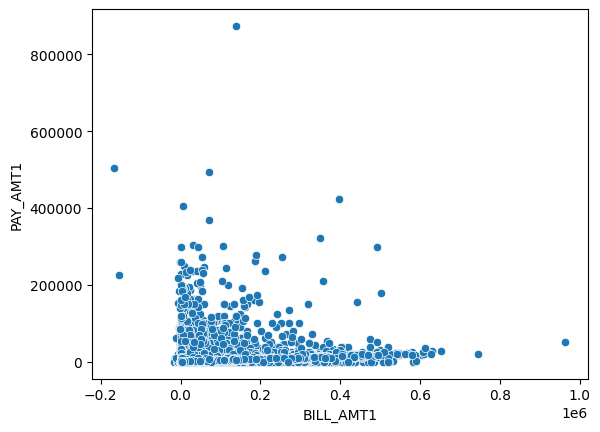

In [72]:
sns.scatterplot(x="BILL_AMT1", y="PAY_AMT1", data=df)
plt.show()

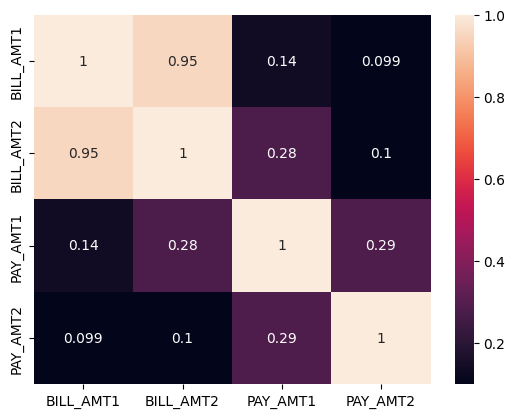

In [73]:
sns.heatmap(df[["BILL_AMT1","BILL_AMT2","PAY_AMT1","PAY_AMT2"]].corr(), annot=True)
plt.show()

A clear relationship exists between several features and the default outcome. Clients who default tend to have lower credit limits and worse repayment status compared to non-defaulters, as observed from the box plots. Repayment status variables (PAY_0–PAY_6) show strong association with default behaviour, highlighting past payment behaviour as a key predictor. Additionally, strong correlations are observed among billing and payment amounts across different months, indicating multicollinearity and temporal consistency in financial behaviour.

# 3. Data Preparation

## 3.1 Data Cleaning

In [74]:
## Clean data
df = df.drop(["ID"], axis=1)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [75]:
df["EDUCATION"] = df["EDUCATION"].replace({0: 4, 5: 4, 6: 4})
df["MARRIAGE"] = df["MARRIAGE"].replace({0: 3})
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [76]:
X = df.drop(['default payment next month'], axis=1).to_numpy()
y = df['default payment next month'].to_numpy()

## 3.2 Train-Test Split

In [77]:
## Split data into train set and test set
test_size = 0.3
random_state = 2025
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# 4. Modelling

### 4.2 Train Model

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
## Initialise and train model
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

In [80]:
logr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [87]:
import pickle

with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(logr, f)

# 5. Model Evaluation

In [86]:
## Evaluate model
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred = logr.predict(X_test_scaled)
y_prob = logr.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      7046
           1       0.37      0.62      0.47      1954

    accuracy                           0.69      9000
   macro avg       0.62      0.67      0.63      9000
weighted avg       0.76      0.69      0.71      9000

[[5010 2036]
 [ 736 1218]]


0.7172595294963264

The Logistic Regression baseline achieved a recall of 0.62 for defaulters, indicating that the model successfully identifies a majority of high-risk customers. Although precision for defaulters is lower at 0.37, this reflects a deliberate trade-off favouring recall, which is appropriate in a credit risk context where missing a defaulter carries higher cost than incorrectly flagging a low-risk customer. Accuracy is therefore not the primary evaluation metric due to class imbalance.

## Iterative model development


In [82]:
## Further feature engineering / feature selection